* https://github.com/windhaunting/Algorithm_Coding_Summary/blob/main/shortest_path.md

### Dijkstra with minheap

In [1]:
#Input graph structure: edge list
# Transfer to Adjcency Matrix
# Dijkstra alogirthm with minheap, complexity is o((V+E)logV), but the complexity is  O(|E|) items on the min_dist queue, high for dense graph

from heapq import heappush
from heapq import heappop
from collections import defaultdict

import sys
 
class Graph():
 
    def __init__(self, edgeList):
        
        #self.graph = [[0 for column in range(vertices)] 
        #              for row in range(vertices)]
        self.graph = defaultdict(dict)
        for frm, to, cost in edgeList:
            self.graph[frm][to] = cost          # bidirectional or undirectional
            self.graph[to][frm] = cost
        self.V = len(self.graph)
        
        #print ("self. V: ", self.V, self.graph)
        
    def printSolution(self, dist):
        print ("Vertex Distance from Source")
        for node in range(self.V):
            print ("to node {} has shortest path distance {}".format(node, dist[node]))

    def dijkstra(self, src):
        dist_dict = {i: float('inf') for i in range(0, self.V)}
        dist_dict[src] = 0 # source node
        
        heap_min_dist = []   # min heap to store the min distance and node to source
        heap_min_dist.append([src, 0]) # init, add src to min heap
        
        visited = set() # store visited nodes
        
        while heap_min_dist:

            # everytime we will select the node which has shortest path from src
            cur_node, cur_dist = heappop(heap_min_dist)

            if cur_node in visited: # 不要重复 visited
                continue

            visited.add(cur_node)
            
            for neighbor in self.graph[cur_node]:  # range(0, len(self.graph[cur_nd])):         # self.graph[cur_nd]
                if neighbor in visited:      # avoid re-visit again
                    continue

                # calculate new distance from src to the neighbor node
                new_dist = cur_dist + self.graph[cur_node][neighbor]
                
                if new_dist < dist_dict[neighbor]: # if find short path to neighbor, update it
                    dist_dict[neighbor] = new_dist
                    heappush(heap_min_dist, [neighbor, new_dist]) # add [neighbor, new_dist] to min_heap
                
        self.printSolution(dist_dict)
       


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

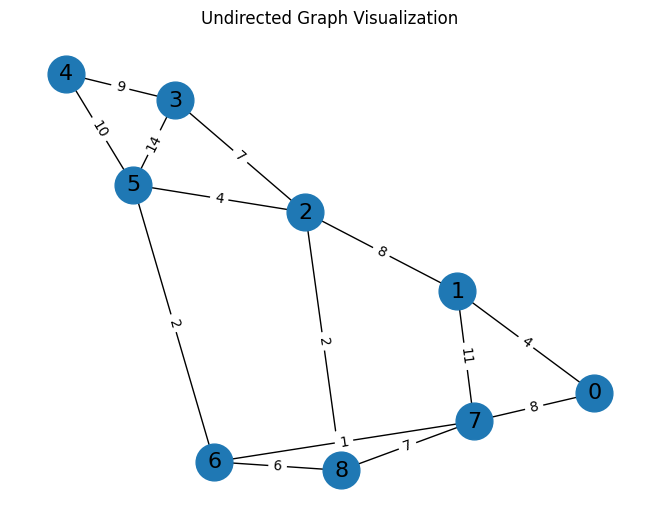

In [3]:

edgeList = [(0, 1, 4), (0, 7, 8), (1, 7, 11), (7, 8, 7), (1, 2, 8), (2, 8, 2), (8, 6, 6), (7, 6, 1), 
            (2, 3, 7), (6, 5, 2), (2,5,4), (3, 5, 14), (3, 4, 9), (4, 5, 10)]



# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for edge in edgeList:
    p1, p2, p3 = edge
    G.add_edge(p1, p2, weight=p3)

# # Draw the graph
# pos = nx.spring_layout(G)  # positions for all nodes

# Generate positions for the nodes using the spring layout
pos = nx.spring_layout(G, weight='weight')  # use the weights to influence the layout

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, font_size=16)

# Draw edge labels (distances)
edge_labels = {(p1, p2): f"{d['weight']}" for p1, p2, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


# # Draw nodes
# nx.draw_networkx_nodes(G, pos, node_size=400)

# # Draw edges
# nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=5)

# # Draw labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# # Draw edge labels
# edge_labels = {(p1, p2): p3 for p1, p2, p3 in edgeList}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show plot
plt.title('Undirected Graph Visualization')
plt.show()
         

In [4]:
g  = Graph(edgeList)

g

In [5]:
g.dijkstra(0)

Vertex Distance from Source
to node 0 has shortest path distance 0
to node 1 has shortest path distance 4
to node 2 has shortest path distance 12
to node 3 has shortest path distance 19
to node 4 has shortest path distance 28
to node 5 has shortest path distance 16
to node 6 has shortest path distance 18
to node 7 has shortest path distance 8
to node 8 has shortest path distance 14
